# Preparation for Case 1

### FAST Model

Initialising Single Particle Beamline
Initialising Single Particle Beamline
None
HOM1


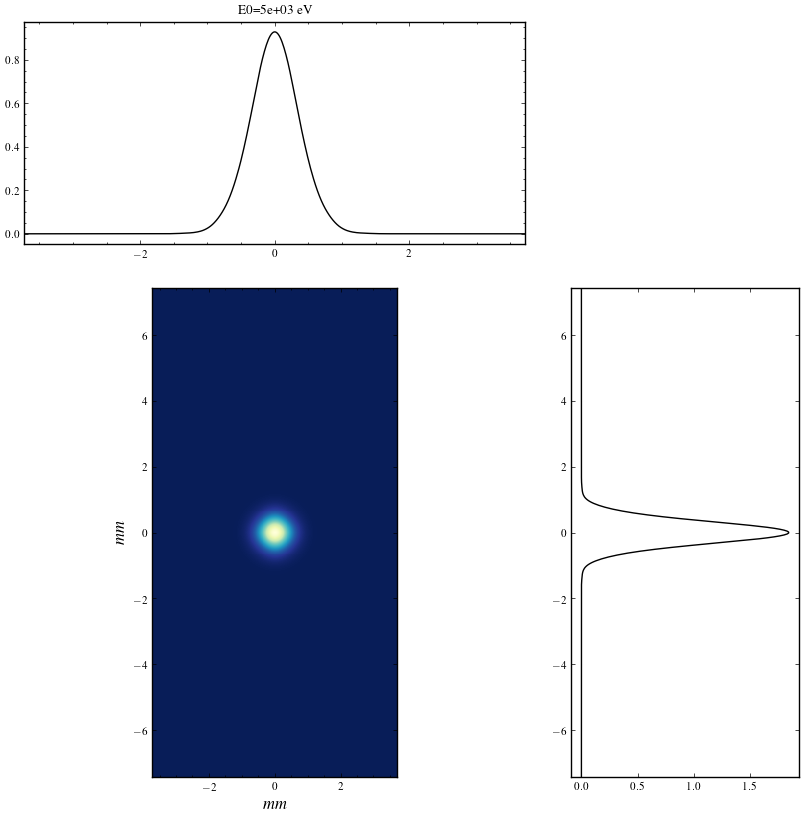

d2


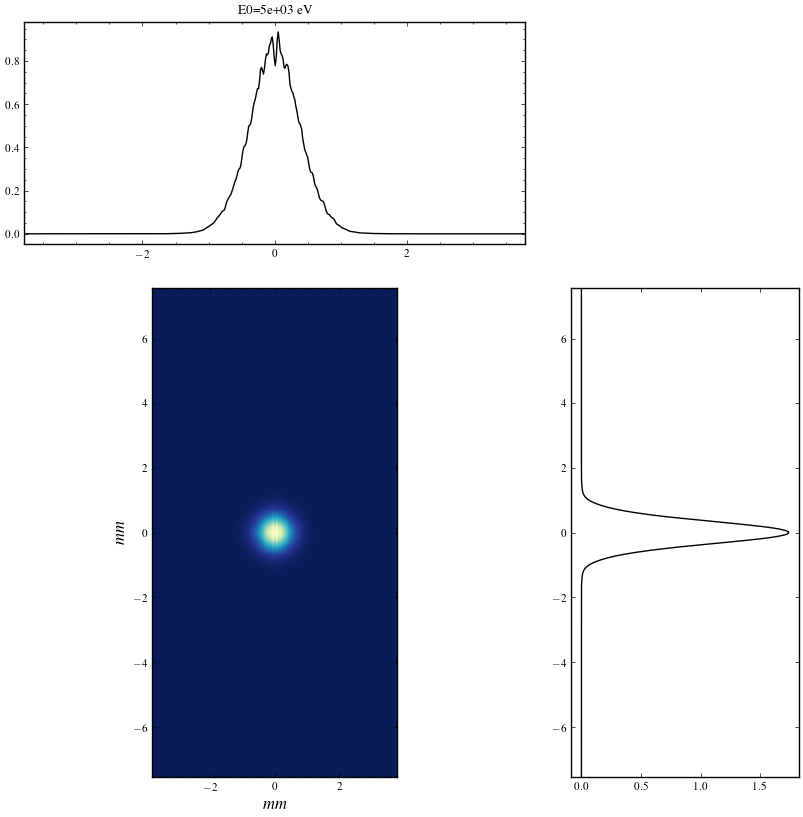

HOM2


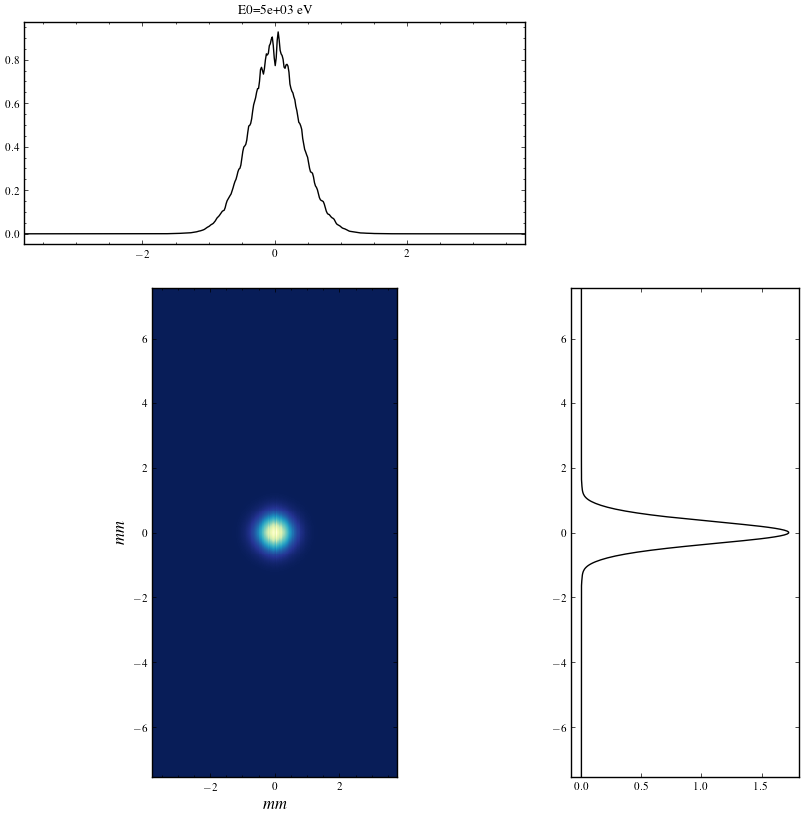

d3


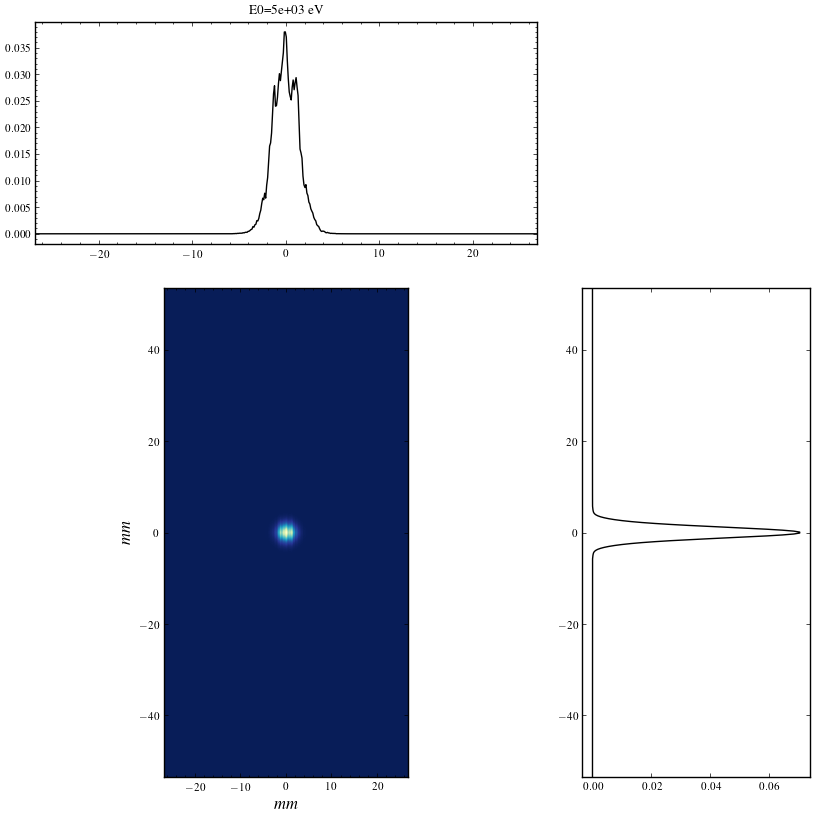

NKB_PSlit


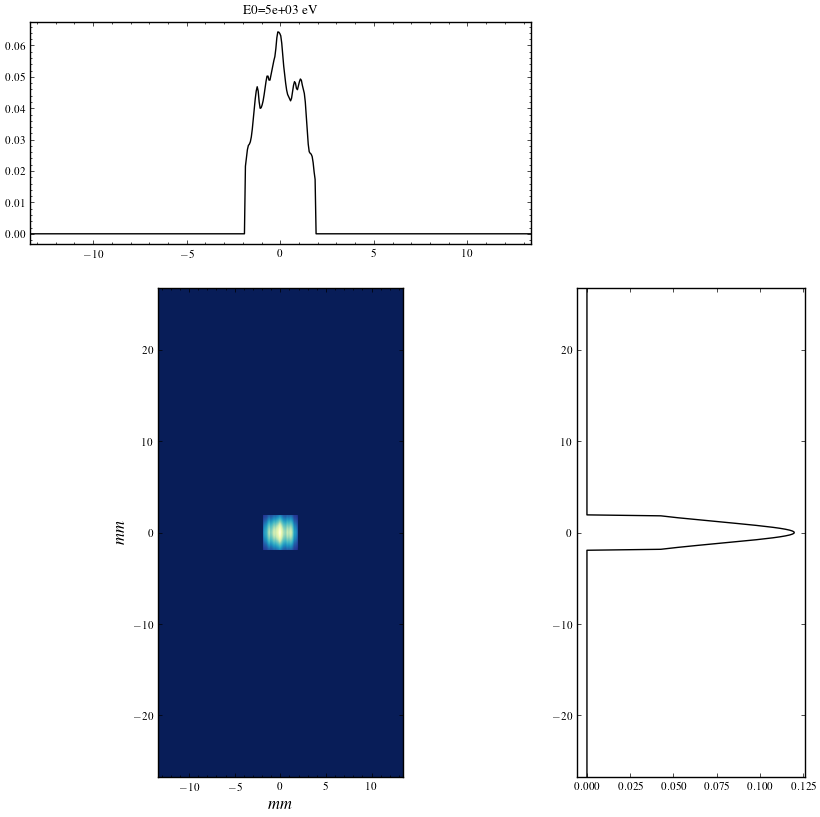

d4


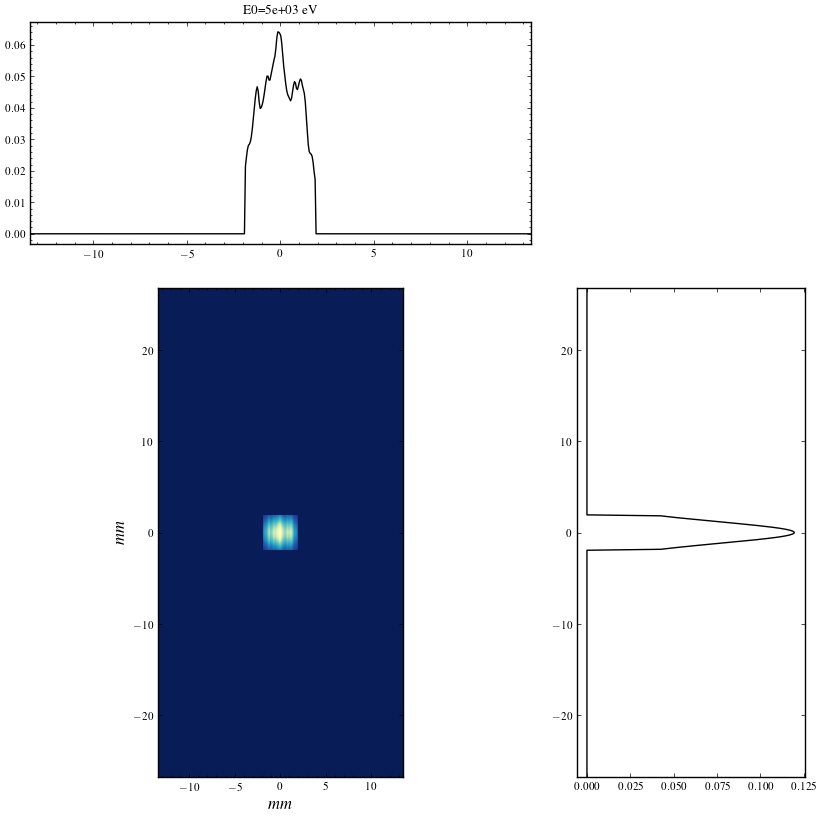

NHE


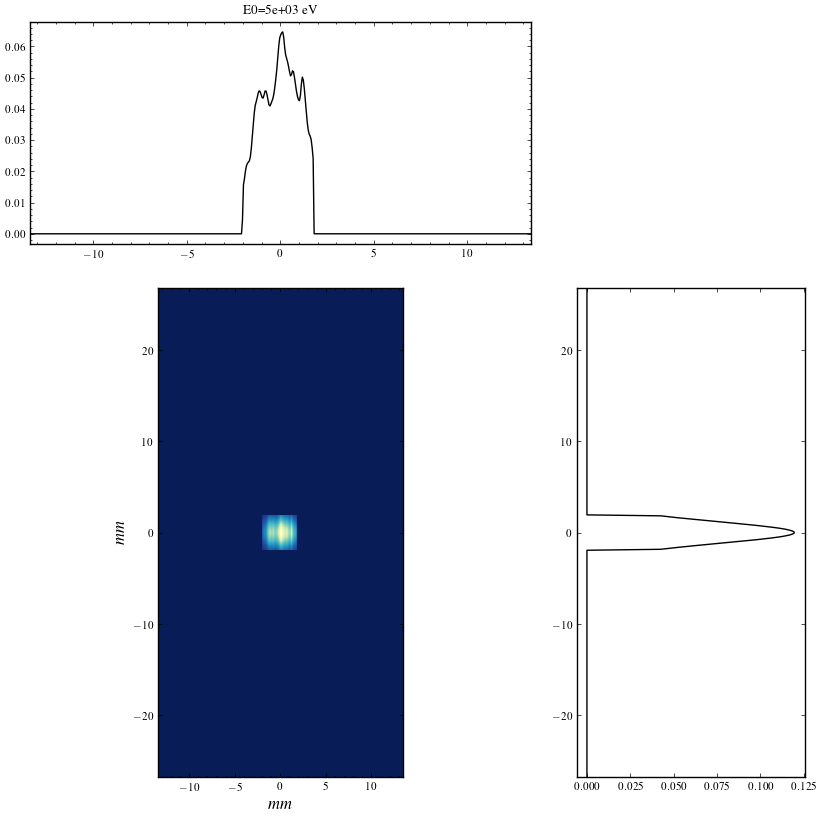

d5


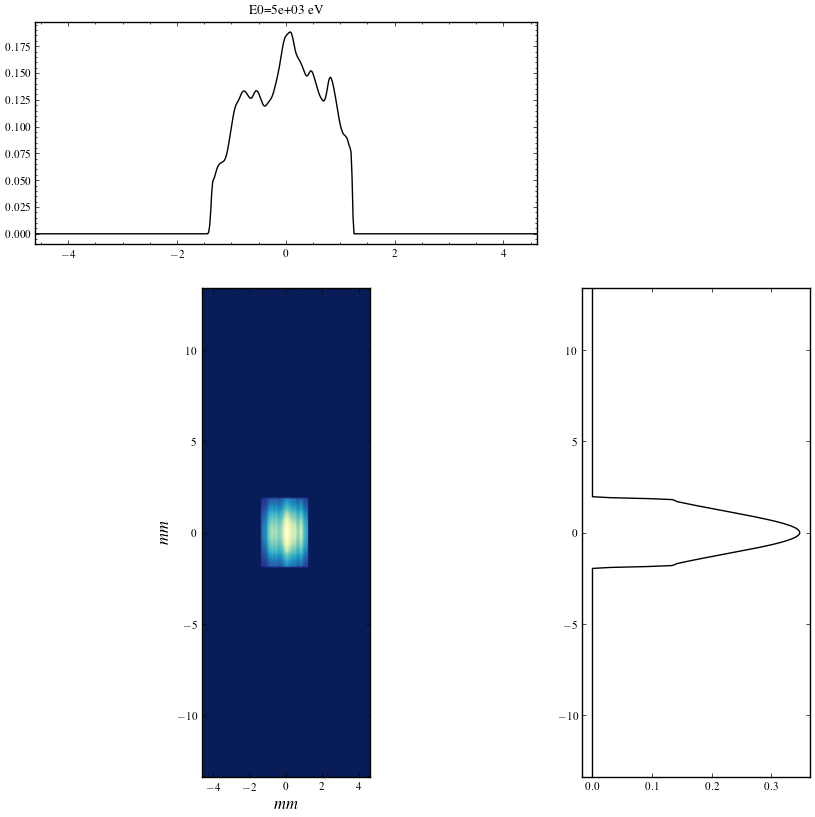

NVE_error


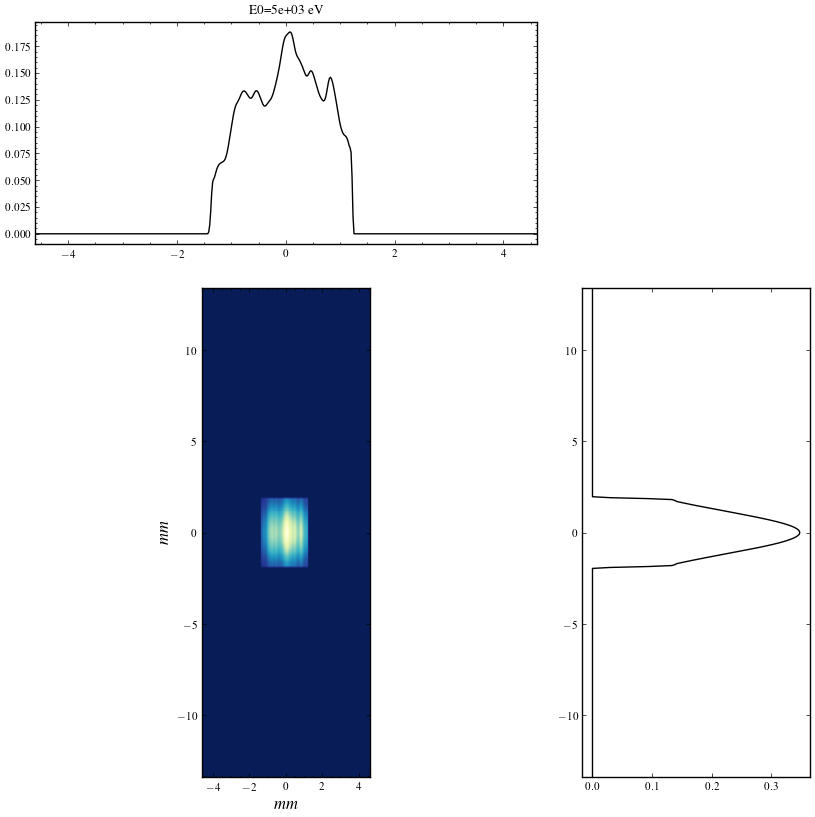

NVE


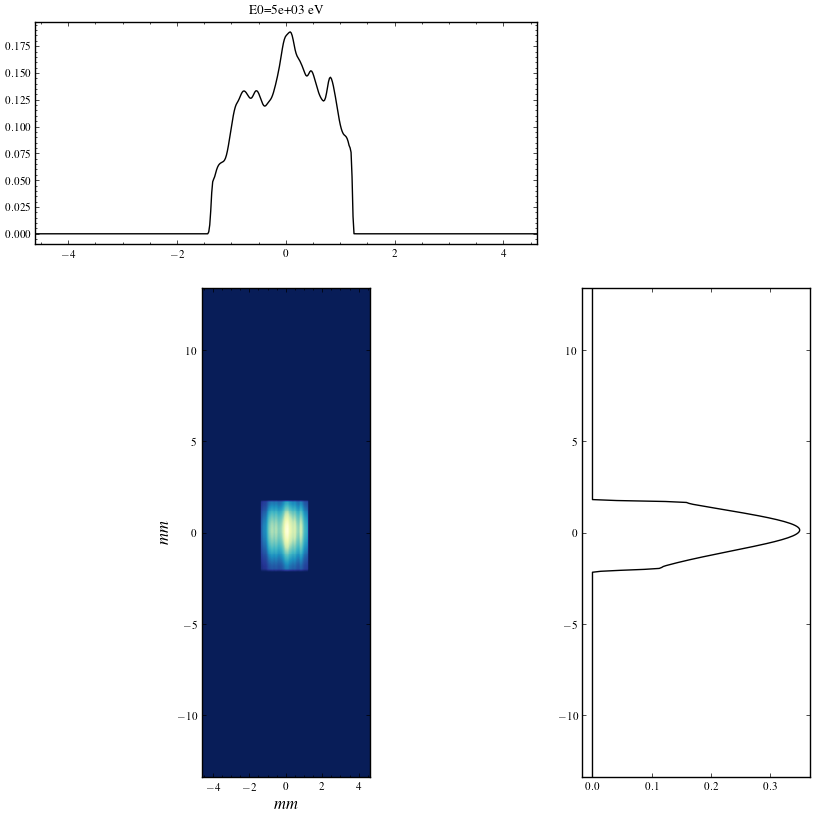

{'ndims': 2, 'nx': 512, 'ny': 512, 'xMin': -0.0003, 'xMax': 0.0003, 'yMin': -0.0003, 'yMax': 0.0003, 'D': ['nx', 'ny', 'xMin', 'xMax', 'yMin', 'yMax']}


In [1]:
import os

from wpg.wpg_uti_wf import plot_intensity_map

from felpy.model.tools import scale
from felpy.model.wavefront import Wavefront
from felpy.model.beamlines.exfel_spb.methods import setup_spb
from felpy.analysis.dataset import Dataset

from labwork.about import dCache
from felpy.model.beamline import Beamline
from wpg.optical_elements import Aperture, Drift
from felpy.model.tools import propagation_parameters

from felpy.model.source import SA1_Source, Source_WPG
from felpy.model.mesh import Mesh
from felpy.analysis.statistics.correlation import norm

mesh = Mesh(nx = 512, ny = 512, xMin = -300e-06, xMax = 300e-06, yMin= -300e-06, yMax= 300e-06)
src_GM = SA1_Source(ekev = 4.98, q = 0.25, S = 1, mesh = mesh)

spb_GM = setup_spb(parameter_file = "/gpfs/exfel/data/user/guestt/FELpy/felpy/data/params/spb-sfx_nkb_GM_4.98.json", theta_KB = 5e-03, theta_HOM = 5.0e-03, crop = ['d1'], surface = False)#bl = spb.bl
spb_GM.edit_propagation_parameters("d1", propagation_parameters(1/5,1,1/5,1,'fraunhofer'))

spb_GM.bl.propagate(src_GM.wfr)

fov_x = src_GM.wfr.params.Mesh.xMax-src_GM.wfr.params.Mesh.xMin
fov_y = src_GM.wfr.params.Mesh.yMax-src_GM.wfr.params.Mesh.yMin

nx = src_GM.mesh.nx
ny = src_GM.mesh.ny

spb = setup_spb(parameter_file = "/gpfs/exfel/data/user/guestt/FELpy/felpy/data/params/spb-sfx_nkb_GM_4.98.json",
                theta_KB = 5e-03, theta_HOM = 5.0e-03, crop = ['HOM1', 'NVE'])

spb.edit_propagation_parameters("HOM1", propagation_parameters(1/2, 1, 1/2, 1 ,mode = 'fresnel'))
spb.edit_propagation_parameters("NVE_error", propagation_parameters(1,1,1,1, mode = 'fresnel'))
spb.edit_propagation_parameters("NKB_PSlit", propagation_parameters(1/2, 1, 1/2, 1 ,mode = 'fresnel'))
spb.edit_propagation_parameters("d5", propagation_parameters(1/2, 1, 1/2, 1 ,mode = 'quadratic'))

spb.remove_element("d1")
#spb.remove_element("NVE_error")
#spb.remove_element("NVE")
#spb.remove_element("d5")
spb.remove_element("NHE_error")
spb.list_elements

#spb.bl.append(Drift(2.2), propagation_parameters(2,2,2,2, mode = 'converge'))
spb.bl.propagate_sequential(src_GM.wfr)
print(src_GM.mesh.__dict__)
fx,fy = src_GM.wfr.get_fwhm()
src_GM.wfr.store_hdf5("./src_GM.h5")


## To Focus

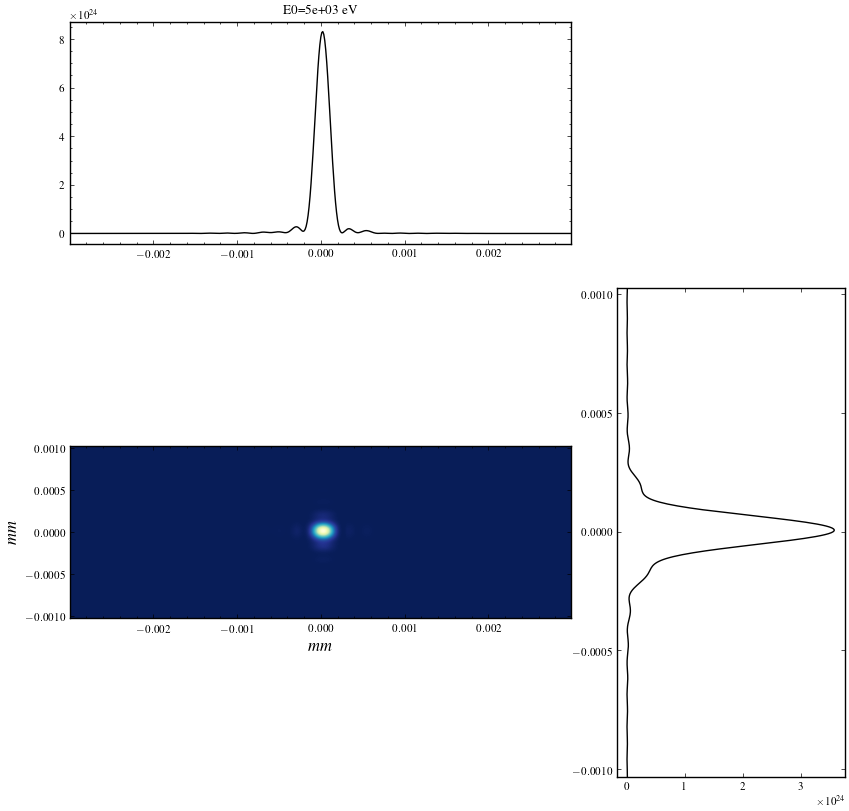

(4.407546136371416e-07, -1.2927686507241278e-07)


In [2]:
from felpy.model.wavefront import Wavefront
from felpy.model.beamline import Beamline
from wpg.optical_elements import Drift
from felpy.model.tools import propagation_parameters
from wpg.wpg_uti_wf import plot_intensity_map

wfr = Wavefront()
wfr.load_hdf5("./src_GM.h5")

bl = Beamline()
bl.append(Drift(2.2), propagation_parameters(5,1,5,1,'converge'))
bl.propagate(wfr)

plot_intensity_map(wfr)
print(wfr.fwhm)